# Case study on Credit Risk

# Context: 
Credit risk is nothing but the default in payment of any loan by the borrower. In Banking sector this is an important factor to 
be considered before approving the loan of an applicant.Dream Housing Finance company deals in all home loans. They have presence
across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer 
eligibility for loan.

# Objective:
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online 
application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History 
and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan 
amount so that they can specifically target these customers. Here they have provided a partial data set.

Dataset:

* Variable	      Description
* Loan_ID	          Unique Loan ID
* Gender	          Male/ Female
* Married	          Applicant married (Y/N)
* Dependents	      Number of dependents
* Education	      Applicant Education (Graduate/ Under Graduate)
* Self_Employed	  Self employed (Y/N)
* ApplicantIncome	  Applicant income
* CoapplicantIncome Coapplicant income
* LoanAmount	      Loan amount in thousands
* Loan_Amount_Term  Term of loan in months
* Credit_History	  credit history meets guidelines
* Property_Area	  Urban/ Semi Urban/ Rural
* Loan_Status	      Loan approved (Y/N)

**Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation.**

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np
import os,sys
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [4]:
df = pd.read_csv('CreditRisk.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


In [5]:
cr_df = df.drop('Loan_ID', axis =1 ) # dropping this column as it will be 1-1 mapping anyways
cr_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


In [6]:
cr_df['Loan_Amount_Term'].value_counts(normalize=True)

360.0    0.853333
180.0    0.073333
480.0    0.025000
300.0    0.021667
84.0     0.006667
240.0    0.006667
120.0    0.005000
36.0     0.003333
60.0     0.003333
12.0     0.001667
Name: Loan_Amount_Term, dtype: float64

In [7]:
#The Loan_Amount_Term is highly skewed - so we will delete this column
cr_df.drop(['Loan_Amount_Term'], axis=1, inplace=True)

In [8]:
cr_df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
for i in list(cr_df.columns[cr_df.dtypes=='object']):   # checking value counts of all object type columns
    print(cr_df[i].value_counts())
    print()

Male      489
Female    112
Name: Gender, dtype: int64

Yes    398
No     213
Name: Married, dtype: int64

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

No     500
Yes     82
Name: Self_Employed, dtype: int64

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64



In [10]:
#filling Null Values

cr_df['Credit_History'].fillna(0,inplace=True)
# assuming that people with missing values don't meet credit history guidlines have 

cr_df['Self_Employed'].fillna('No',inplace=True) #replacing with mode, as maximum people are not self employed

cr_df['Dependents'].fillna('0',inplace=True) #replacing with mode

In [11]:
# Drawing relationship between CoapplicantIncome and Gender

cr_df.groupby('Gender')['CoapplicantIncome'].median()

Gender
Female       0.0
Male      1430.0
Name: CoapplicantIncome, dtype: float64

In [12]:
## Filling null values in gender whose CoapplicantIncome is 0 with female

z = cr_df[cr_df['CoapplicantIncome']==0]

for i in list(z[z['Gender'].isnull()].index):
# # this would give row numbers of places where gender is null and have CoapplicantIncome as 0
     cr_df.loc[i,'Gender'] = 'Female'

In [13]:
cr_df['Gender'].fillna('Male',inplace=True) #replacing remaining values with mode as no other relationship found

In [14]:
#Drawing relationship between Loan_Status, Gender, Property_Area, Married

df.groupby(['Loan_Status','Gender','Property_Area'])['Married'].value_counts()

Loan_Status  Gender  Property_Area  Married
0            Female  Rural          No           7
                                    Yes          3
                     Semiurban      No          12
                                    Yes          1
                     Urban          No          10
                                    Yes          4
             Male    Rural          Yes         39
                                    No          18
                     Semiurban      Yes         27
                                    No          12
                     Urban          Yes         35
                                    No          19
1            Female  Rural          No          12
                                    Yes          2
                     Semiurban      No          22
                                    Yes         19
                     Urban          No          17
                                    Yes          2
             Male    Rural          Ye

In [15]:
cr_df[cr_df['Married'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
104,Male,NaN,0,Graduate,No,3816,754.0,160,1.0,Urban,1
228,Male,NaN,0,Graduate,No,4758,0.0,158,1.0,Semiurban,1
435,Female,NaN,0,Graduate,No,10047,0.0,0,1.0,Semiurban,1


In [16]:
## Replacing with mode observed in above mentioned relationship:

cr_df.loc[104,'Married'] = 'Yes'
cr_df.loc[228,'Married'] = 'Yes'
cr_df.loc[435,'Married'] = 'No'

In [17]:
cr_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
#Lets analysze the distribution of the various attribute
cr_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,614.0,141.166124,88.340630,0.0,98.0,125.0,164.75,700.0
Credit_History,614.0,0.773616,0.418832,0.0,1.0,1.0,1.00,1.0
Loan_Status,614.0,0.687296,0.463973,0.0,0.0,1.0,1.00,1.0


In [19]:
# Let us look at the target column which is 'Loan_Status' to understand how the data is distributed amongst the various values
cr_df.groupby(["Loan_Status"]).mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History
Loan_Status,,,,
0,5446.078125,1877.807292,142.557292,0.505208
1,5384.068720,1504.516398,140.533175,0.895735


In [20]:
#Convert X & Y variable to a categorical variable as relevant
cr_df['Loan_Status'] = cr_df['Loan_Status'].astype('category')
cr_df['Credit_History'] = cr_df['Credit_History'].astype('category')

In [21]:
cr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Gender             614 non-null    object  
 1   Married            614 non-null    object  
 2   Dependents         614 non-null    object  
 3   Education          614 non-null    object  
 4   Self_Employed      614 non-null    object  
 5   ApplicantIncome    614 non-null    int64   
 6   CoapplicantIncome  614 non-null    float64 
 7   LoanAmount         614 non-null    int64   
 8   Credit_History     614 non-null    category
 9   Property_Area      614 non-null    object  
 10  Loan_Status        614 non-null    category
dtypes: category(2), float64(1), int64(2), object(6)
memory usage: 44.7+ KB


In [22]:
#Calculate baseline proportion - ratio of Yes to No to identify data imbalance
prop_Y = cr_df['Loan_Status'].value_counts(normalize=True)
print(prop_Y)

1    0.687296
0    0.312704
Name: Loan_Status, dtype: float64


**There is a slight imbalance in the data**

### Model building using statsmodels.api

In [23]:
## Define X and Y variables
X = cr_df.drop('Loan_Status', axis=1)
Y = cr_df[['Loan_Status']]

In [24]:
#Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)

In [25]:
##Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=1)

In [26]:
#Build the logistic regression model
import statsmodels.api as sm

logit = sm.Logit(y_train, sm.add_constant(X_train))
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.511295
         Iterations 6


In [27]:
#Summary of logistic regression
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  429
Model:                          Logit   Df Residuals:                      415
Method:                           MLE   Df Model:                           13
Date:                Tue, 04 Aug 2020   Pseudo R-squ.:                  0.1691
Time:                        13:29:22   Log-Likelihood:                -219.35
converged:                       True   LL-Null:                       -263.98
Covariance Type:            nonrobust   LLR p-value:                 1.928e-13
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.9592      0.446     -2.149      0.032      -1.834      -0.084
ApplicantIncome         -6.852e-06   2.22e-05     -0.309      0.757   -5.03e-05    3.66e-05


### Interpretation of Pseudo R^2

A pseudo R^2 of 17% indicates that 17% of the uncertainty of the intercept only model is explained by the full model

#### Calculate the odds ratio from the coef using the formula odds ratio=exp(coef)

#### Calculate the probability from the odds ratio using the formula probability = odds / (1+odds)

In [28]:
#Calculate Odds Ratio, probability
##create a data frame to collate Odds ratio, probability and p-value of the coef
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format

In [29]:
# FIlter by significant p-value (pval <0.1) and sort descending by Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
pval_filter = lgcoef['pval']<=0.1
lgcoef[pval_filter]

,coef,Odds_ratio,probability,pval
Credit_History_1.0,2.08,8.04,0.89,0.00
Property_Area_Semiurban,0.80,2.23,0.69,0.01
Married_Yes,0.50,1.65,0.62,0.09
const,-0.96,0.38,0.28,0.03


* Customers with credit history 1 have a 89% probability of defaulting the loan
* Customers in semiurban areas have an odds of 2.50 times to default

### Model building using Logistic Regression from Sklearn 

We will use the sklearn library to build the model and make predictions

In [30]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
y_predict = logreg.predict(X_test)

In [32]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.7599067599067599

Testing accuracy 0.7513513513513513

Confusion Matrix


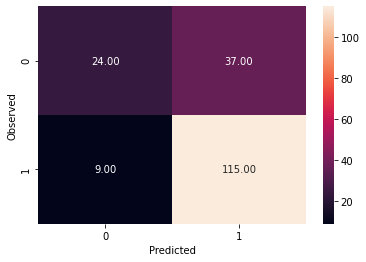

None

Recall: 0.9274193548387096

Precision: 0.756578947368421

F1 Score: 0.8333333333333331

Roc Auc Score: 0.6604309888947646


In [33]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

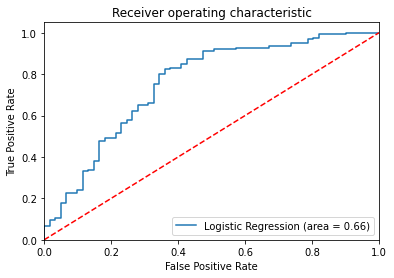

In [34]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

**Checking Parameters of Logistic Regression**

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [35]:
# Checking Parameters of logistic regression
logreg.get_params()

#If we dont specify the parameters in the model it takes default value

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [36]:
# Running a loop to check different values of 'solver'
# all solver can be used with l2, only 'liblinear' and 'saga' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 0.75,solver=i)  # changing values of solver
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.769, 0.755, 0.76, 0.695, 0.695]

[0.751, 0.73, 0.751, 0.67, 0.67]


In [37]:
train_score=[]
test_score=[]
solver = ['liblinear','saga']   # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l1', C = 0.75,solver=i)  #changed penalty to 'l1'
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['liblinear', 'saga']

[0.769, 0.695]

[0.757, 0.67]


In [38]:
## Highest accuracy is same 'l1' with 'liblinear' and 'l2' with 'newton-cg'
# choose any one

In [39]:
model = LogisticRegression(random_state=42,penalty='l1',solver='liblinear',class_weight='balanced') # changing class weight to balanced

model.fit(X_train, y_train) 

y_predict = model.predict(X_test)     

print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))

Trainig accuracy 0.7645687645687645

Testing accuracy 0.7783783783783784


In [40]:
## Testing accuracy increased and model is not overfit anymore so adding class weight from the model, 

In [41]:
# Running a loop to check different values of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear',class_weight='balanced', C=i)  # changing values of C
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.476, 0.765, 0.769, 0.76, 0.76, 0.765]

[0.486, 0.773, 0.778, 0.784, 0.784, 0.778]


In [42]:
## Best testing accuracy is obtained for C=0.5, which is default

Trainig accuracy 0.7599067599067599

Testing accuracy 0.7837837837837838

Confusion Matrix


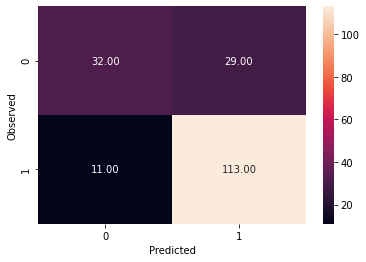

None

Recall: 0.9112903225806451

Precision: 0.795774647887324

F1 Score: 0.849624060150376

Roc Auc Score: 0.7179402432575356


In [43]:
#Therefore final model is
model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear', class_weight='balanced',C=0.5) 
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

In [44]:
# !pip install yellowbrick

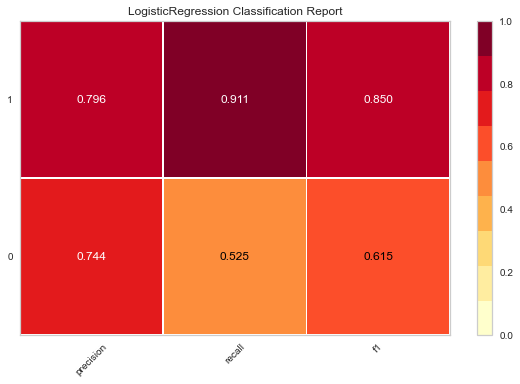

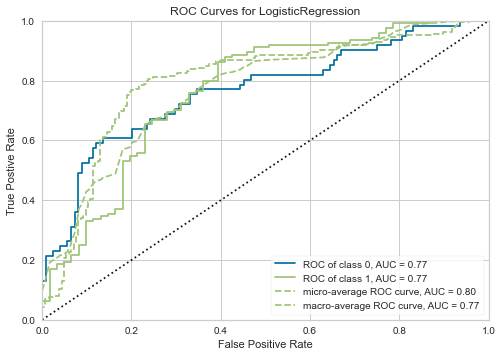

In [45]:
# Additional

from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(model)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

### Business Insights

**Confusion matrix means**

*True Positive (observed=1,predicted=1):*

Predicted that home loan will be granted and the customer was eligibile for loan

*False Positive (observed=0,predicted=1):*

Predicted that home loan will be granted and the customer was not eligibile for loan

*True Negative (observed=0,predicted=0):*

Predicted that home loan will not be granted and the customer was not eligibile for loan

*False Negative (observed=1,predicted=0):*

Predicted that home loan will not be granted and the customer was eligibile for loan

Here the bank wants to give loan to the people who are eligible for the home loan i.e. less number of False Positive, if FP is high bank would lose money. So that the bank doesn't lose money on the people who are not eligible for the loan. Hence Precision is the important metric.

In case of False negative bank will lose few customers but that okay because the bank would want to retain money more than customers who are not eligible for loan.

After achieving the desired accuracy we can deploy the model for practical use. As in the bank now can predict who is eligible for home loan. They can use the model for upcoming customers.